In [2]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [3]:
# Hyperparameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [4]:
# MNIST dataset
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

4.6%

100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




17.9%

100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [6]:
# FNN model
class FNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [7]:
fnn = FNN(input_size, hidden_size, num_classes)


In [8]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(fnn.parameters(), lr=learning_rate)

In [9]:
# Train the model
train_loss = []
test_loss = []
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28)
        labels = labels

        # Forward pass
        outputs = fnn(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            train_loss.append(loss.item())
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Test the model
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28)
            labels = labels
            outputs = fnn(images)
            loss = criterion(outputs, labels)
            test_loss.append(loss.item())
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Epoch [1/5], Step [100/600], Loss: 0.3723
Epoch [1/5], Step [200/600], Loss: 0.1921
Epoch [1/5], Step [300/600], Loss: 0.2912
Epoch [1/5], Step [400/600], Loss: 0.1072
Epoch [1/5], Step [500/600], Loss: 0.0946
Epoch [1/5], Step [600/600], Loss: 0.1154
Test Accuracy of the model on the 10000 test images: 95.69 %
Epoch [2/5], Step [100/600], Loss: 0.1209
Epoch [2/5], Step [200/600], Loss: 0.0752
Epoch [2/5], Step [300/600], Loss: 0.1197
Epoch [2/5], Step [400/600], Loss: 0.1011
Epoch [2/5], Step [500/600], Loss: 0.1968
Epoch [2/5], Step [600/600], Loss: 0.0408
Test Accuracy of the model on the 10000 test images: 96.93 %
Epoch [3/5], Step [100/600], Loss: 0.0227
Epoch [3/5], Step [200/600], Loss: 0.0877
Epoch [3/5], Step [300/600], Loss: 0.0947
Epoch [3/5], Step [400/600], Loss: 0.0570
Epoch [3/5], Step [500/600], Loss: 0.1457
Epoch [3/5], Step [600/600], Loss: 0.0848
Test Accuracy of the model on the 10000 test images: 97.47 %
Epoch [4/5], Step [100/600], Loss: 0.0145
Epoch [4/5], Step [

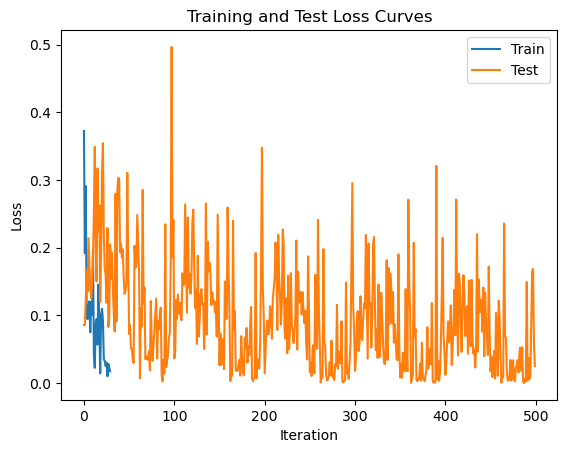

In [10]:
# Plot the training and test loss curve
plt.plot(train_loss, label='Train')
plt.plot(test_loss, label='Test')
plt.legend()
plt.title('Training and Test Loss Curves')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()